# DataTables, Indexes, Pandas, and Seaborn

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
sns.set_context("notebook")

## Getting the Data

https://www.ssa.gov/OACT/babynames/index.html

https://www.ssa.gov/data/

We can run terminal/shell commands directly in a notebook! Here's the code to download the dataset (not running since it takes a while):

    !wget https://www.ssa.gov/oact/babynames/state/namesbystate.zip

In [ ]:
# !wget https://www.ssa.gov/oact/babynames/state/namesbystate.zip
!unzip namesbystate.zip

In [15]:
!ls

03-datatables-indexes-pandas.ipynb     NC.TXT
03live-datatables-indexes-pandas.ipynb ND.TXT
AK.TXT                                 NE.TXT
AL.TXT                                 NH.TXT
AR.TXT                                 NJ.TXT
AZ.TXT                                 NM.TXT
CA.TXT                                 NV.TXT
CO.TXT                                 NY.TXT
CT.TXT                                 OH.TXT
DC.TXT                                 OK.TXT
DE.TXT                                 OR.TXT
FL.TXT                                 PA.TXT
GA.TXT                                 RI.TXT
HI.TXT                                 SC.TXT
IA.TXT                                 SD.TXT
ID.TXT                                 StateReadMe.pdf
IL.TXT                                 TN.TXT
IN.TXT                                 TX.TXT
KS.TXT                                 UT.TXT
KY.TXT                                 VA.TXT
LA.TXT                                 VT.TXT
MA.TXT                   

In [16]:
!head CA.TXT

In [18]:
!wc -l CA.TXT

  367931 CA.TXT


In [ ]:
# !cat CA.TXT

## Question 1: What was the most popular name in CA last year?

In [23]:
ca = pd.read_csv('CA.TXT', header=None, names=['State', 'Sex', 'Year', 'Name', 'Count'])
ca.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Slicing

In [25]:
ca['Count'].head()

0    295
1    239
2    220
3    163
4    134
Name: Count, dtype: int64

In [26]:
ca[0:3]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220


In [ ]:
# ca[0]

In [28]:
ca.iloc[0:3, 0:2]

,State,Sex
0,CA,F
1,CA,F
2,CA,F


In [29]:
ca.loc[0:3, 'State']

0    CA
1    CA
2    CA
3    CA
Name: State, dtype: object

In [30]:
ca.loc[0:5, 'Sex':'Name']

,Sex,Year,Name
0,F,1910,Mary
1,F,1910,Helen
2,F,1910,Dorothy
3,F,1910,Margaret
4,F,1910,Frances
5,F,1910,Ruth


What is the leftmost column?

In [37]:
emails = ca.head()
emails.index = ['a@gmail.com', 'b@gmail.com', 'c@gmail.com', 'd@gmail.com', 'e@gmail.com']
emails

,State,Sex,Year,Name,Count
a@gmail.com,CA,F,1910,Mary,295
b@gmail.com,CA,F,1910,Helen,239
c@gmail.com,CA,F,1910,Dorothy,220
d@gmail.com,CA,F,1910,Margaret,163
e@gmail.com,CA,F,1910,Frances,134


In [38]:
emails.loc['b@gmail.com':'d@gmail.com', 'Year':'Name']

,Year,Name
b@gmail.com,1910,Helen
c@gmail.com,1910,Dorothy
d@gmail.com,1910,Margaret


In [40]:
ca.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [44]:
(ca['Year'] == 2016).head()

0    False
1    False
2    False
3    False
4    False
Name: Year, dtype: bool

In [45]:
ca[ca['Year'] == 2016].head()

,State,Sex,Year,Name,Count
213461,CA,F,2016,Mia,2785
213462,CA,F,2016,Sophia,2747
213463,CA,F,2016,Emma,2592
213464,CA,F,2016,Olivia,2533
213465,CA,F,2016,Isabella,2350


### Sorting

In [49]:
ca_sorted = ca[ca['Year'] == 2016]
ca_sorted.sort_values('Count', ascending=False).head()

,State,Sex,Year,Name,Count
213461,CA,F,2016,Mia,2785
213462,CA,F,2016,Sophia,2747
365035,CA,M,2016,Noah,2683
213463,CA,F,2016,Emma,2592
213464,CA,F,2016,Olivia,2533


## Question 2: Most popular names in all states for each year?

### Put all DFs together

In [52]:
# Make sure that filesizes are managable
!ls -alh *.TXT | head

-rw-r--r--  1 sam  staff   548K Mar 10 00:00 AK.TXT
-rw-r--r--  1 sam  staff   2.6M Mar 10 00:00 AL.TXT
-rw-r--r--  1 sam  staff   1.9M Mar 10 00:00 AR.TXT
-rw-r--r--  1 sam  staff   2.2M Mar 10 00:00 AZ.TXT
-rw-r--r--  1 sam  staff   7.3M Mar 10 00:00 CA.TXT
-rw-r--r--  1 sam  staff   2.0M Mar 10 00:00 CO.TXT
-rw-r--r--  1 sam  staff   1.6M Mar 10 00:00 CT.TXT
-rw-r--r--  1 sam  staff   1.1M Mar 10 00:00 DC.TXT
-rw-r--r--  1 sam  staff   628K Mar 10 00:00 DE.TXT
-rw-r--r--  1 sam  staff   3.9M Mar 10 00:00 FL.TXT


In [ ]:
glob('*.TXT')

In [55]:
file_names = glob('*.TXT')

baby_names = pd.concat(
    (pd.read_csv(f, names=['State', 'Sex', 'Year', 'Name', 'Count']) for f in file_names)
).reset_index(drop=True)
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [56]:
len(baby_names)

5838786

### Group by state and year

In [57]:
baby_names[
    (baby_names['State'] == 'CA')
    & (baby_names['Year'] == 1995)
    & (baby_names['Sex'] == 'M')
].head()

# Now I could write 3 nested for loops...

,State,Sex,Year,Name,Count
675533,CA,M,1995,Daniel,5003
675534,CA,M,1995,Michael,4783
675535,CA,M,1995,Jose,4572
675536,CA,M,1995,Christopher,4096
675537,CA,M,1995,David,4029


In [61]:
baby_names.groupby('State').size().head()

State
AK     27624
AL    130297
AR     98853
AZ    110866
CA    367931
dtype: int64

In [64]:
state_counts = baby_names.loc[:, ('State', 'Count')]
state_counts.head()

,State,Count
0,AK,14
1,AK,12
2,AK,10
3,AK,8
4,AK,7


In [73]:
state_counts.groupby('State').sum().head()

,Count
State,
AK,424852
AL,5773719
AR,3408590
AZ,3532872
CA,30115165


    state_counts.group('State', np.sum)

In [69]:
state_counts.groupby('State').agg(np.sum).head()

,Count
State,
AK,424852
AL,5773719
AR,3408590
AZ,3532872
CA,30115165


Using a custom function to aggregate.

Equivalent to this code from Data 8:

    state_and_groups.group('State', np.sum)

### Grouping by multiple columns

In [75]:
baby_names.groupby(['State', 'Year']).size().head()

State  Year
AK     1910    16
       1911    11
       1912    20
       1913    12
       1914    32
dtype: int64

In [76]:
baby_names.groupby(['State', 'Year']).sum().head()

Count
State Year       
AK    1910    115
      1911     84
      1912    141
      1913    110
      1914    245

In [80]:
baby_names.groupby(['State', 'Year', 'Sex']).sum().head()

Count
State Year Sex       
AK    1910 F       68
           M       47
      1911 F       44
           M       40
      1912 F       82

In [90]:
def first(series):
    '''Returns the first value in the series.'''
    return series.iloc[0]

most_popular_names = (
    baby_names
    .groupby(['State', 'Year', 'Sex'])
    .agg(first)
)
most_popular_names

Name  Count
State Year Sex                 
AK    1910 F        Mary     14
           M        John      8
      1911 F        Mary     12
           M        John     15
      1912 F        Mary      9
           M        John     16
      1913 F        Mary     21
           M        John     19
      1914 F        Mary     22
           M        John     17
      1915 F        Mary     23
           M        John     21
      1916 F        Mary     18
           M        John     25
      1917 F        Mary     21
           M        John     26
      1918 F        Mary     27
           M        John     23
      1919 F        Mary     22
           M        John     24
      1920 F        Mary     38
           M        John     21
      1921 F        Mary     36
           M        John     35
      1922 F        Mary     29
           M      Robert     22
      1923 F        Mary     26
           M        John     27
      1924 F        Mary     41
           M        John     36
...                  ...    ...
WY    2002 F     Madison     35
           M       Ethan     52
      2003 F        Emma     38
           M       Jacob     47
      2004 F     Madison     40
           M     Michael     34
      2005 F     Madison     38
           M       Jacob     41
      2006 F       Emily     39
           M       Ethan     44
      2007 F     Madison     36
           M       James     38
      2008 F     Madison     35
           M       James     41
      2009 F    Isabella     36
           M       Wyatt     42
      2010 F    Isabella     44
           M       James     36
      2011 F        Emma     43
           M     William     32
      2012 F        Emma     40
           M        Liam     41
      2013 F      Sophia     42
           M        Liam     33
      2014 F      Olivia     40
           M     Jackson     34
      2015 F        Emma     39
           M        Liam     38
      2016 F        Emma     36
           M       Wyatt     46

[10914 rows x 2 columns]

This creates a multilevel index. It is quite complex, but just know that you can still slice:

In [91]:
most_popular_names[most_popular_names['Name'] == 'Samuel']

,,,Name,Count
State,Year,Sex,,
ID,2010,M,Samuel,114


And you can use `.loc` as so:

In [94]:
most_popular_names.loc['CA', 1997, 'M']

Name     Daniel
Count      4452
Name: (CA, 1997, M), dtype: object

In [95]:
most_popular_names.loc['CA', 1995:2000, 'M']

Name  Count
State Year Sex               
CA    1995 M    Daniel   5003
      1996 M    Daniel   4705
      1997 M    Daniel   4452
      1998 M    Daniel   4317
      1999 M    Daniel   4352
      2000 M    Daniel   4339

## Question 3: Can I deduce gender from the last letter of a person’s name?

Survey question time!

### Compute last letter of each name

In [97]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [101]:
baby_names['Name'].apply(len).head()

0    4
1    5
2    4
3    8
4    5
Name: Name, dtype: int64

In [102]:
baby_names['Name'].str.len().head()

0    4
1    5
2    4
3    8
4    5
Name: Name, dtype: int64

In [106]:
baby_names['Name'].str[-1].head()

0    y
1    e
2    a
3    t
4    n
Name: Name, dtype: object

To add column to dataframe:

In [107]:
baby_names['Last letter'] = baby_names['Name'].str[-1]
baby_names.head()

,State,Sex,Year,Name,Count,Last letter
0,AK,F,1910,Mary,14,y
1,AK,F,1910,Annie,12,e
2,AK,F,1910,Anna,10,a
3,AK,F,1910,Margaret,8,t
4,AK,F,1910,Helen,7,n


### Group by last letter and sex

In [108]:
letter_counts = (baby_names
                 .loc[:, ('Sex', 'Count', 'Last letter')]
                 .groupby(['Last letter', 'Sex'])
                 .sum())
letter_counts.head()

Count
Last letter Sex          
a           F    49128453
            M     1585024
b           F        9666
            M     1369244
c           F       18211

### Visualize our result

Use .plot to get some basic plotting functionality:

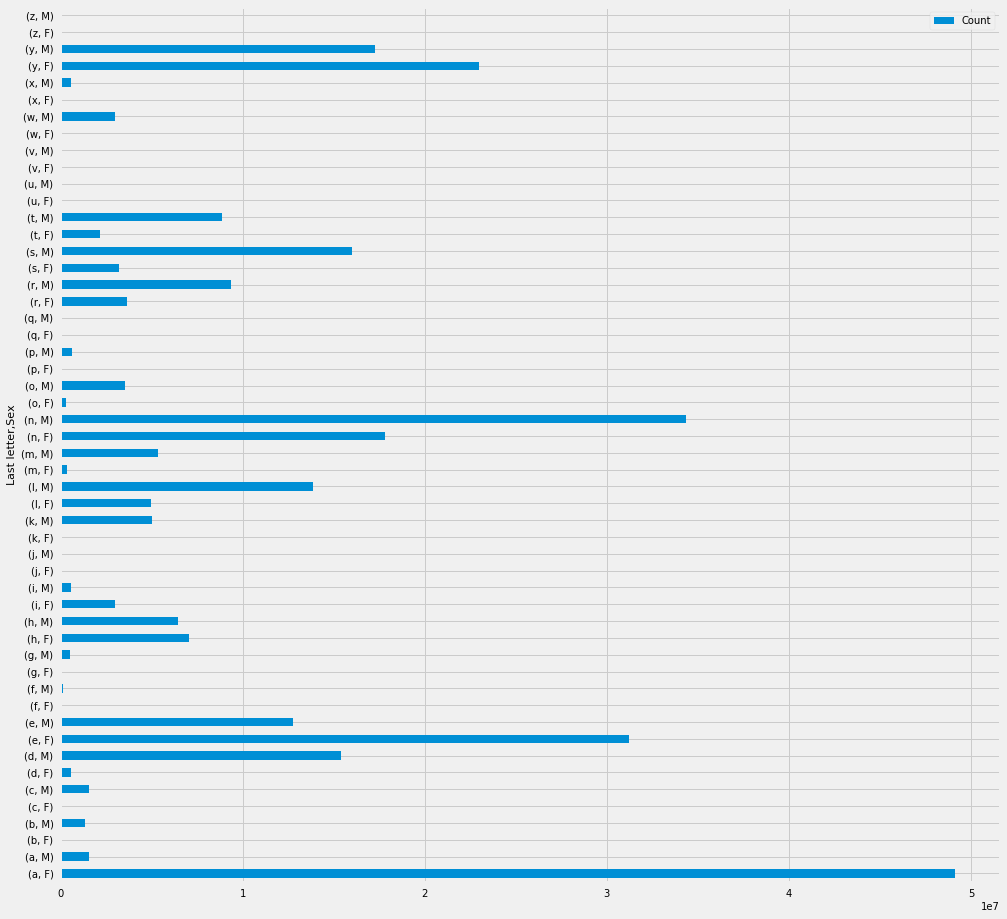

In [110]:
# Why is this not good?
letter_counts.plot.barh(figsize=(15, 15))

Reading the docs shows me that pandas will make one set of bars for each column in my table. How do I move each sex into its own column? I have to use pivot:

In [111]:
# For comparison, the group above:
# letter_counts = (baby_names
#                  .loc[:, ('Sex', 'Count', 'Last letter')]
#                  .groupby(['Last letter', 'Sex'])
#                  .sum())

last_letter_pivot = baby_names.pivot_table(
    index='Last letter', # the rows (turned into index)
    columns='Sex', # the column values
    values='Count', # the field(s) to processed in each group
    aggfunc=sum, # group operation
)
last_letter_pivot.head()

Sex,F,M
Last letter,,
a,49128453,1585024
b,9666,1369244
c,18211,1565621
d,564804,15423771
e,31212081,12778932


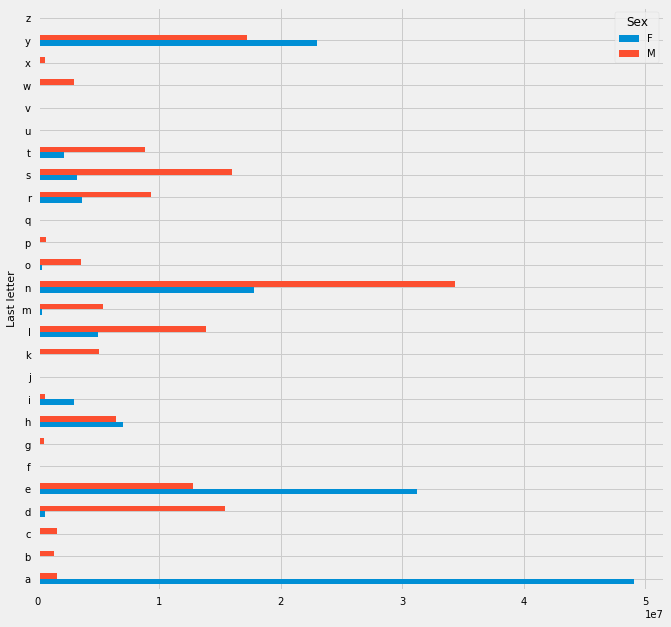

In [112]:
last_letter_pivot.plot.barh(figsize=(10, 10))

Why is this still not ideal?

- Plotting raw counts
- Not sorted by any order

In [113]:
totals = last_letter_pivot['F'] + last_letter_pivot['M']

last_letter_props = pd.DataFrame({
    'F': last_letter_pivot['F'] / totals,
    'M': last_letter_pivot['M'] / totals,
}).sort_values('M')
last_letter_props.head()

,F,M
Last letter,,
a,0.968746,0.031254
i,0.830335,0.169665
e,0.709510,0.290490
z,0.645210,0.354790
y,0.571341,0.428659


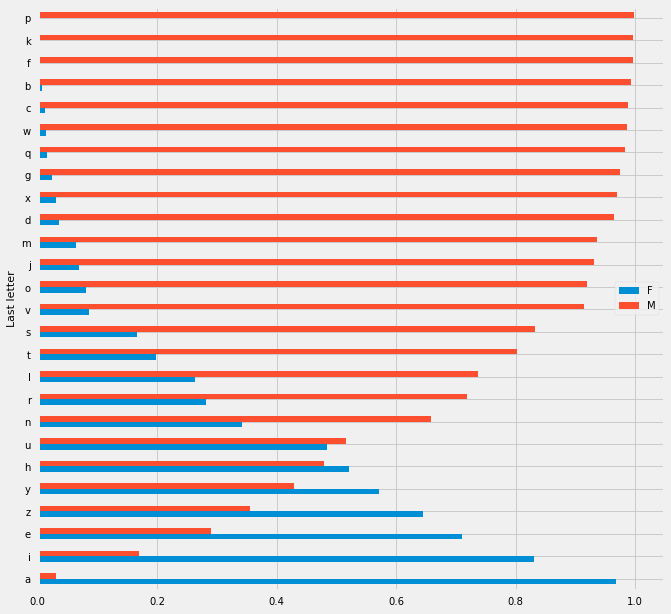

In [114]:
last_letter_props.plot.barh(figsize=(10, 10))

What do you notice?

## Seaborn

Let's use a subset of our dataset for now:

In [ ]:
ca_and_ny = baby_names[
    (baby_names['Year'] == 2016)
    & (baby_names['State'].isin(['CA', 'NY']))
]
ca_and_ny.head()

We actually don't need to do any pivoting / grouping for seaborn!

In [1]:
sns.barplot(x=..., y=..., data=...)

NameError: name 'sns' is not defined

Note the automatic confidence interval generation. Many seaborn functions have these nifty statistical features.

(It actually isn't useful for our case since we have a census. It also makes seaborn functions run slower since they use bootstrap to generate the CI, so sometimes you want to turn it off.)

Going to work with tips data just to demonstrate:

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.distplot(...)

In [ ]:
sns.lmplot(x=..., y=..., data=...)